#Izhikevich Neuron Model Simulation
Izhikevich's neuron model, is a model developed using dynamical system analysis. Although the model parameters don't have biological interpretations, the model is rather very good at modelling differnet spiking dynamics such as regular spiking, fast spiking, and bursting.

Let's try and model the neuron and see what is that like. Let's import what we need

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

Define the Izhikevich model using parameters a,b, c, and d. Also define a handy plotting function

In [ ]:
def Izhikevich_neuron(a, b, c, d, fn_input_current, duration=1000):
  #discrete time
  time = [0]
  
  #membrane potential
  v = [c]
  
  #recovery variable
  u = [b*c]

  #time resolution
  dt = 0.001

  I = [fn_input_current(0)] #input current
  
  # value at which the membrane will reset the membrane potential
  reset_voltage = 30
  
  for t in np.arange(dt, duration, step=dt):
    time.append(t)
    v_old = v[-1]
    u_old = u[-1]
    I_old = I[-1]

    I_new = fn_input_current(t)
    I.append(I_new)
    
    dvdt = 0.04 * v_old**2 + 5*v_old + 140 - u_old + I_new
    dudt = a*(b*v_old-u_old)
    
    v_new = v_old + dvdt
    u_new = u_old + dudt
    
    if v_new > reset_voltage:
      v_new = c
      u_new = u_old+d

    v.append(v_new)
    u.append(u_new)
    
  return (time, v, u, I)

def plot_ishkevich(a, b, c, d, duration, fn_input_current):
  t, v, u, I = Izhikevich_neuron(a=a, b=b, c=c, d=d, fn_input_current=fn_input_current, duration=duration)
  
  fig, axs = plt.subplots(2, 1, constrained_layout=True, figsize=(9, 7), dpi=90, facecolor='w', edgecolor='k')
  axs[0].set_title("Input Current over time")
  axs[0].plot(t, I, color="green")
  axs[0].set_xlabel("time (ms)")
  axs[0].set_ylabel("Voltage (mV)")
  axs[1].plot(t, v)
  axs[1].plot(t, u, color="red")
  axs[1].set_title("Membrane Potential (v) vs Recovery variable (u)")
  axs[1].set_xlabel("time (ms)")
  axs[1].set_ylabel("Voltage (mV)")

Define simulation conditions

In [ ]:
duration = 20

def fixed_current(t):
  return 10

def periodic_current(t):
  return math.sin(2*t/10*math.pi)*5

def one_step_current(t):
  if t < duration / 2:
    return 0
  else:
    return 4

This is a bursting neuron

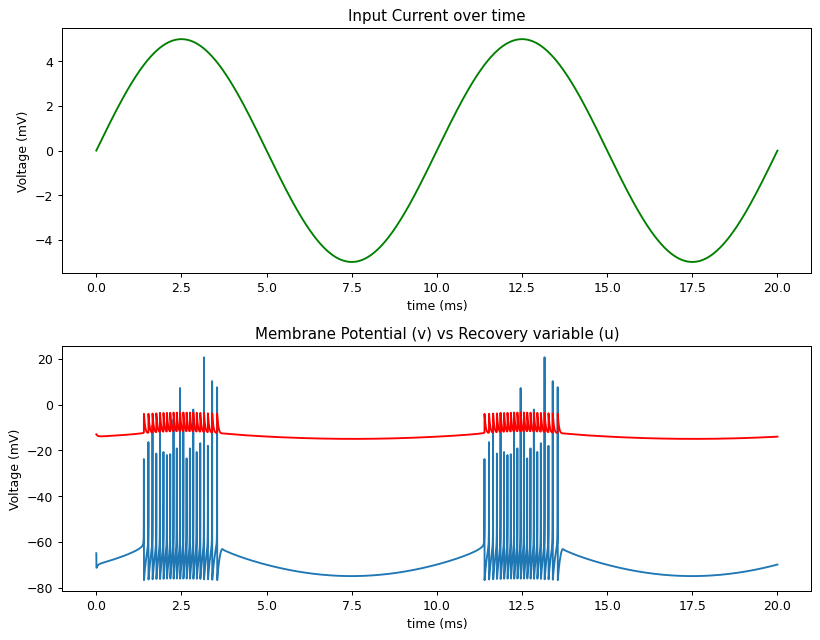

In [ ]:
a = 0.02
b = 0.2
c = -65
d = 8
plot_ishkevich(a=a, b=b, c=c, d=d, duration=duration, fn_input_current = periodic_current)

Regular vs Fast vs Bursting

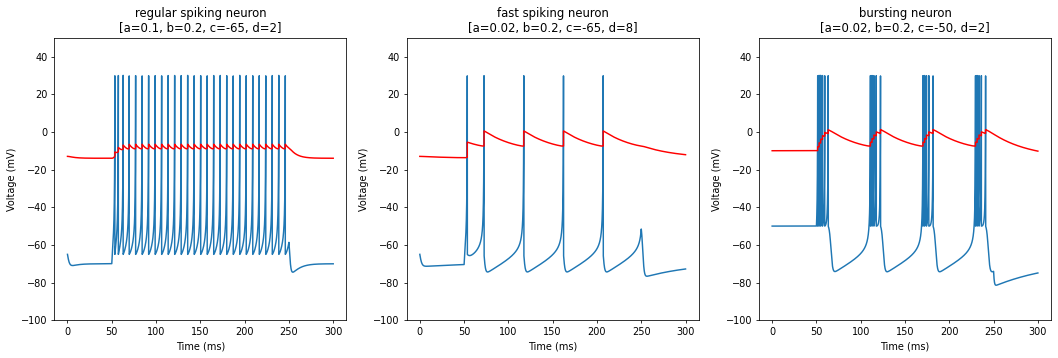

In [102]:
def standalone():
  """
  This function ensures that variable and imports for this problem is name 
  spaced and information from previous cells doesn't leak
  """
  
  #Import numpy for high performance vector and matrix operations
  import numpy as np
  
  #Model parameters for the 3 scenarios
  a = np.array([0.1, 0.02, 0.02])
  b = np.array([0.2, 0.2, 0.2])
  c = np.array([-65, -65, -50])
  d = np.array([2, 8, 2])

  neurons_count = len(a)

  #Simulation duration
  duration=300
  
  #Threshold of spiking
  threshold=30
  
  def pulse_current(t):
    """
    Define a pulse from 50 ms to 250 ms
    """
    if t >= 50 and t <= 250:
      return 10
    else:
      return 0

  #stores the time at which the neuron was simulated
  t = [0]
  
  #Amount of time between two time points in the simulation
  delta_t = 0.001

  #stores the membrane potential, rows for each neuron, column for each point in time
  potential = [[] for t in range(int(duration/delta_t))]

  #store the the recovery variable, rows for each neuron, column for each point in time
  recovery = [[] for t in range(int(duration/delta_t))]
  
  #Values at the begining of time
  potential[0] = v = c
  recovery[0] = u = b*c
  
  # Stores the current injected at time t
  i = []
  
  #Iteration index
  index = 1
  
  for t_step in np.arange(delta_t, duration, step=delta_t):
    """
    At every step we are going to calculate the membrane potential and check 
    whether or not a spike occured.
    """

    #store the time as it elapses
    t.append(t_step)

    #evaluate the current at the time step
    injected_current = pulse_current(t_step)
    
    #Which neuron did spike?
    firing = v>=threshold

    #Update the neuron that fired
    v[firing]=c[firing]
    u[firing]=u[firing]+d[firing]

    #Integrate the membrane potential
    delta_v = delta_t * (0.04 * np.power(v,2) + 5*v + 140 - u + injected_current)
    
    #Integrate the recovery variable
    delta_u = delta_t * a*(b*v-u)

    v = v + delta_v
    u = u + delta_u

    #Store values of this iteration
    i.append(injected_current)
    potential[index]=v
    recovery[index]=u
    
    #prepare for next iteration
    index = index + 1

  #Time to plot the results
  
  #Import plotting libraries
  import matplotlib.pyplot as plt
  from matplotlib.pyplot import figure

  #Define plotting informaiton
  title = ["regular spiking neuron", "fast spiking neuron", "bursting neuron"]

  #Create 3 side by side plots
  fig, axs = plt.subplots(1, 3, constrained_layout=True, figsize=(15, 5), dpi=70, facecolor='w', edgecolor='k')

  #plot every model in its own subplot
  for i in range(neurons_count):
    #declare a meainingful title and axis labels
    axs[i].set_title(f"{title[i]}\n[a={a[i]}, b={b[i]}, c={c[i]}, d={d[i]}]")
    axs[i].set_xlabel("Time (ms)")
    axs[i].set_ylabel("Voltage (mV)")
    #set a consistent limit on the y axis
    axs[i].set_ylim(bottom=-100,top=50)
    axs[i].plot(t, np.array(potential)[:,i])
    axs[i].plot(t, np.array(recovery)[:,i], color="red")

standalone()